<a href="https://colab.research.google.com/github/IngerMasha/week12/blob/main/SciPy_and_Statistics_Exercises_XP_Ninja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1: Analysis of Diet Effects on Growth


In [2]:
import pandas as pd

data_url = '/content/ChickWeight.csv'
df = pd.read_csv(data_url)
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0  weight  Time  Chick  Diet
0           1      42     0      1     1
1           2      51     2      1     1
2           3      59     4      1     1
3           4      64     6      1     1
4           5      76     8      1     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  578 non-null    int64
 1   weight      578 non-null    int64
 2   Time        578 non-null    int64
 3   Chick       578 non-null    int64
 4   Diet        578 non-null    int64
dtypes: int64(5)
memory usage: 22.7 KB
None
       Unnamed: 0      weight        Time       Chick        Diet
count  578.000000  578.000000  578.000000  578.000000  578.000000
mean   289.500000  121.818339   10.717993   25.750865    2.235294
std    166.998503   71.071960    6.758400   14.568795    1.162678
min      1.000000   35.000000    0.000000    1.000000    1.000000
25%

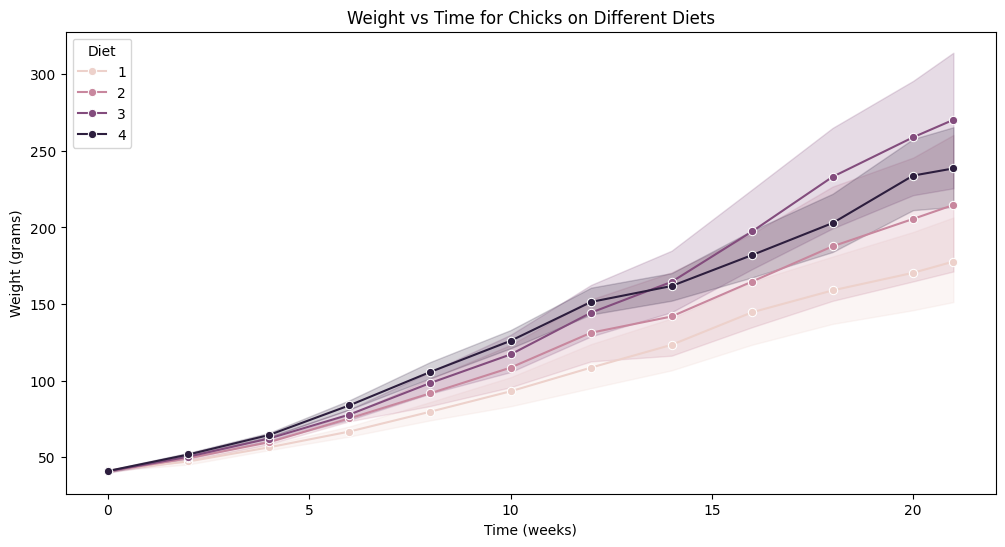

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Time', y='weight', hue='Diet', marker='o')
plt.title('Weight vs Time for Chicks on Different Diets')
plt.xlabel('Time (weeks)')
plt.ylabel('Weight (grams)')
plt.legend(title='Diet')
plt.show()



Diet 1 exhibits the slowest weight gain rate among the diets tested. In contrast, Diets 3 and 4 demonstrate the highest rates of weight gain. This indicates that Diets 3 and 4 are more effective in promoting faster growth compared to Diet 1.



In [4]:
from scipy.stats import f_oneway

diet1 = df[df['Diet'] == 1]['weight']
diet2 = df[df['Diet'] == 2]['weight']
diet3 = df[df['Diet'] == 3]['weight']

f_value, p_value = f_oneway(diet1, diet2, diet3)

print('F-value:', f_value)
print('P-value:', p_value)


F-value: 13.3780596765456
P-value: 2.2578907427945403e-06


The F-value shows how much the mean weights differ between the diets. The P-value indicates statistical significance. If the P-value > 0.05, the differences are considered not significant.

In [5]:
import numpy as np
from scipy.stats import linregress

def growth_rate_analysis(data):
    diet_growth_rates = {}
    for diet in data['Diet'].unique():
        diet_df = data[data['Diet'] == diet]
        slope, _, _, _, _ = linregress(diet_df['Time'], diet_df['weight'])
        diet_growth_rates[diet] = slope
    return diet_growth_rates

growth_rates = growth_rate_analysis(df)
print('Growth rates by diet:', growth_rates)


Growth rates by diet: {1: 6.841797198382122, 2: 8.60913628800484, 3: 11.422870972621388, 4: 9.714365562015413}


The fourth diet provides the greatest weight gain.

Введение:

Objective of the study: Analysis of the effect of diets on the growth of chickens.
Description of data: weight, time, chick, diet.

Data analysis:
Calculations were made with graphs showing changes in the weight of chickens over time for different diets.
The results of the ANOVA test, indicating the statistical significance of the differences, show that in this case the differences are not considered significant.

Results:
Diet number 3 showed the highest rate of weight gain, and number 1 the lowest.
Growth rates for each diet:
1: 6.8,
2: 8.6,
3: 11.4,
4: 9.7

Conclusion:

Based on the analysis, determine the most effective diet for the growth of chickens - diet number 3.
